In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/ProteinConc/'
prots = pd.read_csv(workdir + '20230515_prot_conc_599.csv')

for i in range(len(prots.columns)):
    print(str(i) + ' ' + prots.columns[i])

0 Wavelength (nm)
1 H2O
2 prot_2
3 prot_4
4 prot_8
5 prot_12
6 prot_16
7 prot_20
8 prot_24
9 prot_28
10 prot_32
11 prot_36


In [5]:
def auto_zero(protdb):
    for name in protdb.columns[1:]:
        #print(protdb.columns)
        x = protdb[name][400:500]  - protdb[protdb.columns[0]][400:500]
        y = sum(x)/len(x)
        protdb[name] = protdb[name] - y
    return protdb




def get_conc(prot, xs, bfactor):
    xs_re = np.array(xs).reshape(-1, 1)
    ys_280 = prot.iloc[280-200, :]
    print(ys_280)
    reg_280 = LinearRegression().fit(xs_re, ys_280)
    print('R: {}'.format(reg_280.score(xs_re, ys_280)))
    print('intercept_: {}'.format(reg_280.intercept_))

    ys_280_corr = ys_280 - reg_280.intercept_
    prot_conc = ys_280_corr/bfactor*1000*1000

    factors = [1/x for x in xs[1:]]
    prot_conc_stock = []

    for i in range(6):
        prot_conc_stock.append(prot_conc[i+1]*factors[i])

    print(prot_conc_stock)
    print(np.mean(prot_conc_stock[1:]))


    fig,ax = plt.subplots()
    ax.scatter(xs_re, ys_280)
    ax.plot(xs_re, ys_280)
    plt.xlim([0, 0.04])
    plt.ylim([-0.05, 1.5])
    return prot_conc_stock, np.mean(prot_conc_stock[1:])

Index(['H2O', 'prot_2', 'prot_4', 'prot_8', 'prot_12', 'prot_16', 'prot_20',
       'prot_24', 'prot_28', 'prot_32', 'prot_36'],
      dtype='object')


/tmp/ipykernel_9247/2727702859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protdb[name] = protdb[name] - y


(-0.05, 0.3)

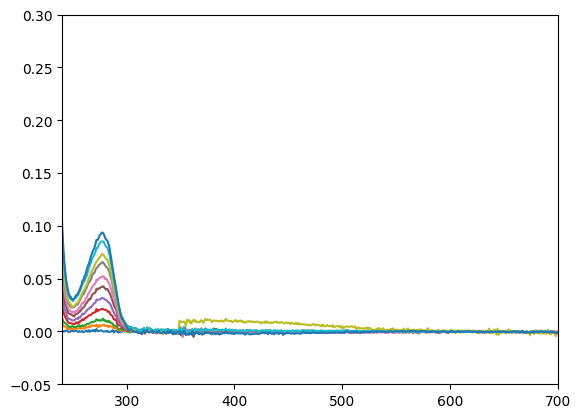

In [6]:

prot_599 = prots[prots.columns[1:]]
print(prot_599.columns)


#print(prot599_HBST.iloc[280-190, 1])
prot_599 = auto_zero(prot_599)
#print(prot599_HBST.iloc[280-190, 1])

fig,ax = plt.subplots()
for name in prot_599.columns:
    ax.plot(prots[prots.columns[0]], prot_599[name])

plt.xlim([240, 700])
plt.ylim([-0.05, 0.3])




H2O        0.000189
prot_2     0.005069
prot_4     0.010631
prot_8     0.020641
prot_12    0.030113
prot_16    0.040672
prot_20    0.049642
prot_24    0.062667
prot_28    0.069874
prot_32    0.081698
prot_36    0.088728
Name: 80, dtype: float64
R: 0.9988815268715584
intercept_: 0.00044452667426232023
[357.07767534653897, 393.2974438508756, 389.89327771694366, 381.83776442390837, 388.2951545920626, 379.9029691562755]
386.64532194801313


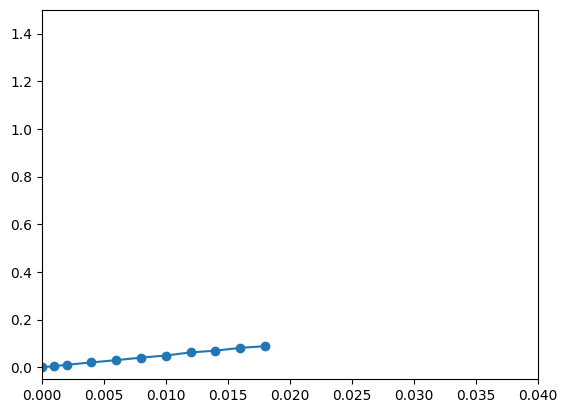

In [7]:
xs = [0, 2/2000, 4/2000, 8/2000, 12/2000, 16/2000, 20/2000, 24/2000, 28/2000, 32/2000, 36/2000]
bfactor=12950

prot_599_concs, prot_599_conc = get_conc(prot_599, xs, bfactor)
